In [1]:
# Python Notebook for PHYS 321B Computational Assignment #3

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from matplotlib import rc
import scipy as sp

# extra stuff to make the plots look nice:

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

params = {"text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["cmr10"],
          "font.size": 20
         }
plt.rcParams.update(params)
plt.rcParams['axes.formatter.use_mathtext'] = True

import os
os.environ["PATH"]
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin/'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# Set tick parameters using rcParams
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.major.width'] = 0.7
plt.rcParams['xtick.minor.width'] = 0.7
plt.rcParams['ytick.major.width'] = 0.7
plt.rcParams['ytick.minor.width'] = 0.7

plt.rcParams['font.weight'] = 'bold'


#### 1. In this assignment I want you to generate experience using a ‘while’ loop.

Consider a mass m sliding on a frictionless hemisphere (like the top of bowling ball). 

Using the equations of motion from question 3 in the regular assignment, make a program which starts with the mass at (or very near) θ = 0 (ie at the top) and then updates the position and θ′ for some small time-step.

Have it run the algorithm ‘while the constraining force on r points in the positive direction update θ, otherwise report θ’.

Run the program to check what angle the mass will lose contact with the hemisphere when starting at θ = 0 and θ′ = 0.

Produce a graph showing the angle of lost contact as a function of θ′ when θ = 0.

---
The equations of motion found in question 3 are:

\begin{equation}
m\ddot{r} = mr \dot{\theta}^2 - mg cos \theta + \lambda
\end{equation}

and:

$$
mr^2 \ddot{\theta} = mgrsin \theta
$$

With force of constraint:

$$
\lambda = mgcos \theta - mr \dot{\theta}^2
$$

We may simplify our problem a lot by enforcing that $r=R$ which implies $\ddot{r} = 0$. We then get that:

$$
mR^2 \ddot{\theta} = mgRsin \theta
$$

Or:

$$
\ddot{\theta} = \frac{g}{R}sin \theta
$$

---

To write our desired program we require a number of elements. Firstly, is an algorithm to solve the EOMs. We may use the techniques involved in the second computational assignment. As time steps progress and $\theta$ and $\dot{\theta}$ are updated, we may then check the condition that:

$$
\lambda >0 \longrightarrow mgcos \theta - mR \dot{\theta}^2 >0
$$

Once that condition breaks, we then simply record the value for the two parameters and the initial conditions we supply the algorithm .

In [2]:
# constants of the problem: 

# we will set 
g=9.81 #m/s^2
R = 1 # m
m = 1 # kg

# basic initial conditions:

theta_0 = 0
theta_p0 = 0

In [6]:
# we will implement the while loop structure inside of a function
# so that we can run it for a number of different initial conditions:

# first we can define a constraint function that can check
# if lambda > 0 or not:

def constraint(theta, theta_p, g=g, m=m, R=R):
    '''
    takes current value of 
    theta and theta prime and 
    returns whether or not the 
    constraint is still valid
    '''
    lamb = m*g*np.cos(theta) - m*R*(theta_p**2)
    
    if lamb > 0:
        return True
    if lamb < 0:
        return False

def algorithm(TS=0.01, th0=theta_0, thp0 = theta_p0, g=g, m=m, R=R):
    '''
    Takes a time step TS, a number of 
    iterations N, a value for the two
    initial conditions and constants
    t0, tp0, g, ell 
    and returns the angle and angular 
    velocity that is reached when
    the mass leaves the sphere
    '''
    
    thetas = [th0]
    theta_primes = [thp0]
    index = 0
    while (constraint(thetas[index], theta_primes[index])):
        
        # for first element of the arrays, use initial conditions:
        if index==0:
            # implements algorithm
            thet = th0 + thp0 * TS
            thet_p = thp0 + (g/R) *np.sin(th0)* TS
            
            # adds new values to lists
            thetas.append(thet)
            theta_primes.append(thet_p)
            index+=1
            
        else:
            # implements algorithm
            thet = thetas[index-1] + theta_primes[index-1] * TS
            thet_p = theta_primes[index-1] + (g/R) *np.sin(thetas[index-1])* TS
            
            # adds new values to lists
            thetas.append(thet)
            theta_primes.append(thet_p)
            index+=1
            
            
    return thetas[-1], theta_primes[-1]

In [28]:
# lets run it for a bunch of initial velocities:

# experimented with this to get all features with sufficient sampling:

vels = np.linspace(0., 5, 100)

# to simulate theta_0 = 0 without the algorithm getting stuck we set it to:

th0_in = 0.0001

# appropriately small timestep:

time_step = 0.001

data = np.array([algorithm(TS = time_step, th0 = th0_in, thp0 = vels[i]) for i in range(len(vels))]).T



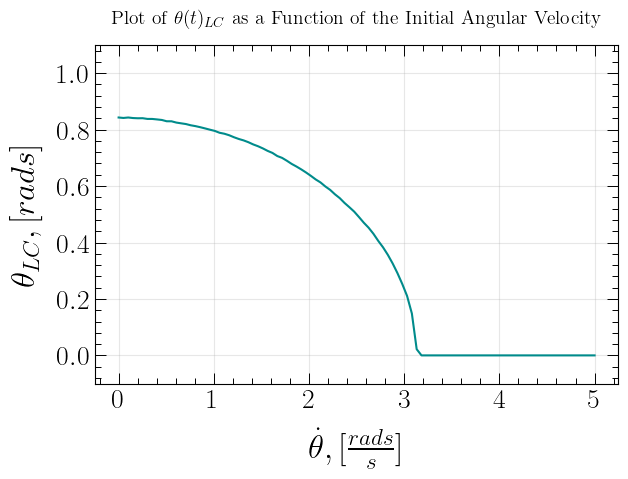

In [29]:
# plots a figre of the angle of lost contact as a function of theta prime
# for theta ~ 0:

# initiates plotting parameters
width=8;height=6;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

ax1.set_title(r"Plot of $\theta (t)_{LC}$ as a Function of the Initial Angular Velocity", pad = 15, fontsize=14)
ax1.set_xlabel(r"$\dot{\theta}, [\frac{rads}{s}]$",labelpad =10, fontsize=24)
ax1.set_ylabel(r"$\theta_{LC}, [rads]$",labelpad =10,fontsize=24)

# actual plots:

ax1.plot(vels,  data[0],c='darkcyan')

# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(0.2));ax1.yaxis.set_minor_locator(MultipleLocator(0.04))
ax1.xaxis.set_major_locator(MultipleLocator(1));ax1.xaxis.set_minor_locator(MultipleLocator(0.2))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
#ax1.legend( prop={'size': 12}, loc='lower right')
ax1.set_ylim(-0.1,1.1)
ax1.grid(True)
plt.show()


As we can see, for small initial velocities it takes a considerable angle passed through until we lose contact. With increasing initial velocities, this value decreases as would be expected. It then reaches a point where it starts with such initial angular velocity that it is never bound to the hemisphere to begin with. This occurs around $\dot{\theta}_0 \approx 3.2$.